In [1]:
!pip install mne
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git > /dev/null
!pip install bctpy
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
!pip install pingouin
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
# plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#-----------------------------------------------------------------------------------------------------------------
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import euclidean_distances
import mne
#-----------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
# from mne.viz.utils import plt_show,tight_layout
# from mne.io.pick import _picks_to_idx
from scipy.spatial.distance import squareform 
# from mne.viz import plot_topomap
import matplotlib.colors as colors
import matplotlib.cm as cmx
# from MIfunctions import *
#-----------------------------------------------------------------------------------------------------------------
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
# from mne.viz.topomap import _check_outlines, _draw_outlines
# from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import scipy.io as sio
import numpy as np
from joblib import load
import bct

     |████████████████████████████████| 6.9 MB 4.9 MB/s 
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-sdxrh3zn
     |████████████████████████████████| 102 kB 5.3 MB/s 
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-7y03dsuy
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-7y03dsuy
     |████████████████████████████████| 206 kB 5.1 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 9.8 MB 109 kB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=b9da0f14555e105333e7d654e197f6f4704429335503fc8a0189f81ea269add5
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=bc01ed580278b6ba1c42bf41867d79af91886f5f947c507

In [2]:
from sklearn.base import TransformerMixin,BaseEstimator
class FB_feats2(TransformerMixin,BaseEstimator):
    def __init__(self, fs=250,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[2.5,4.5],[3,5]]),gammad=1,feat='kcon',ncomp = 6,method='fft',normalize=True,n_cycles=7.0):
        self.vtw = vtw
        self.fs = fs
        self.f_frec = f_frec
        self.gammad = gammad
        self.feat = feat
        self.method = method
        self.normalize = normalize
        self.ncomp = ncomp
        self.n_cycles = n_cycles
        
    def connection_rho(self,rho,fs,channels_names,thr=0.9,mean_by_time_windows=None,
                       mean_by_frequencies=None,figsize=(30,30),save=True,sbj='',acc='',
                       format='png',path='',Ch='s',cmap_tplt='jet',normalizate='True'):
    # whether mean_by_time_windows or mean_by_frequencies are True, the rho vector will be averaged over time or frequency.
    #but, also it can be a vector, such as, [0,0,1,1,2,2] that indicates  which indices of rho will be averaged.
      if Ch !='s':
          self.Ch = Ch
      self.P = int(0.5*self.Ch*(self.Ch-1))
      rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
      if mean_by_time_windows is None and  mean_by_frequencies is None:
          times = len(self.vtw)
          frecs = len(self.f_frec)
          rho = rhoMc
      elif mean_by_time_windows is not None and  mean_by_frequencies is not None:
          times = len(np.unique(mean_by_time_windows))
          frecs = len(np.unique(mean_by_frequencies))
          rhof=[]
          for i in np.unique(mean_by_frequencies):
              rhof.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1,keepdims=True))
          rhof=np.array(rhof)
          rhof = np.swapaxes(rhof,0,-1).squeeze()
          rho = []
          for i in np.unique(mean_by_time_windows):
              rho.append(np.mean(rhof[:,mean_by_time_windows==i,:],axis=-2,keepdims=True))
          rho=np.array(rho)
          rho = np.swapaxes(rho,0,2).squeeze()
      elif mean_by_time_windows is None:
          times = len(self.vtw) 
          frecs = len(np.unique(mean_by_frequencies))
          rho=[]
          for i in np.unique(mean_by_frequencies):
              rho.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1,keepdims=True))
          rho=np.array(rho)
          rho = np.swapaxes(rho,0,-1).squeeze()
      else:
          frecs = len(self.f_frec)
          times = len(np.unique(mean_by_time_windows))
          rho = []
          for i in np.unique(mean_by_time_windows):
              rho.append(np.mean(rhoMc[:,mean_by_time_windows==i,:],axis=-1,keepdims=True))
          rho=np.array(rho)
          rho = np.swapaxes(rho,0,2).squeeze()
      montage = mne.channels.read_montage('standard_1005')
      layout = mne.channels.read_layout('EEG1005')
      info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",
                              montage=montage)
      pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
      # pick channels
      picks = _picks_to_idx(info,channels_names)
      pos = pos[picks]
      # adjust positions
      pos, outlines = _check_outlines(pos, 'head')
      pos_x = pos[:,0]
      pos_y = pos[:,1]
      names = np.array(layout.names)[picks]
      if normalizate:
          rho=((rho-rho.min())/(rho.max()-rho.min()))
      cmap = cmap_tplt # plt.cm.jet
      if normalizate:
          cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
      else:
          cNorm  = colors.Normalize(vmin=0, vmax=1)
      scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
      rhotopo = np.zeros((Ch,frecs,times))
      for time in range(times):
          for frec in range(frecs):
              rhotopo[:,frec,time] = squareform(rho[:,time,frec]).sum(axis=1)
      rhotopo = rhotopo-rhotopo.min()
      rhotopo /= rhotopo.max()
      f,ax = plt.subplots(frecs,times,figsize=figsize)
      for time in range(times): 
          for frec in range(frecs):
              rhok = squareform(rho[:,time,frec])
              plot_topomap(rhotopo[:,frec,time], pos, axes=ax[frec,time], cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
              if thr >1:
                  indx_pct = np.where(np.triu(rhok)>np.percentile(rho.ravel()[rho.ravel()>1e-8], thr))
              else:
                  indx_pct = np.where(np.triu(rhok)>thr)
              ax[frec,time].set(xticks=[], yticks=[], aspect='equal')
              #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
              _draw_outlines(ax[frec,time], outlines)
              for i in range(np.shape(indx_pct)[-1]):
                  ch1=indx_pct[0][i]
                  ch2=indx_pct[1][i]     
                  ax[frec,time].arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                          pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                          width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
              for ch1 in  np.unique(np.ravel(indx_pct)):
                  ax[frec,time].scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                  ax[frec,time].annotate(names[ch1], xy=pos[ch1,:],size=15)
      cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
      sm = plt.cm.ScalarMappable(cmap=cmap_tplt)
      sm.set_array(rho.ravel())
      plt.colorbar(sm,cax=cax)
      if save ==True:
          plt.savefig(str(path)+'Cxsbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
      return

In [3]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_probability as tfp
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()
tf.random.set_seed(42)
import types
import tempfile
class Keras_CKA2(BaseEstimator, TransformerMixin):
	def __init__(self,epochs=200,batch_size=30,Q=0.9,learning_rate=1e-3,optimizer='Adam',
		  l1_param=0,l2_param=0,validation_split=0.2,gamma=1.0,verbose=1,init_='def_keras',gamma_y=1e-13):
		self.epochs = epochs
		self.gamma = gamma
		self.gamma_y = gamma_y
		self.batch_size = batch_size
		self.learning_rate=learning_rate 
		self.l1_param=l1_param 
		self.l2_param=l2_param
		self.validation_split = validation_split
		self.verbose = verbose
		self.optimizer = optimizer
		self.Q=Q
		self.init_=init_
  	# Define custom loss
	def custom_cka_loss(self,y_true,y_pred): #ytrue labels, ypred  = Xw
		####gradiente##########################################
		scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, 
                                                              length_scale=tf.constant(self.gamma,dtype=tf.float32))
		scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, 
                                                               length_scale=tf.constant(self.gamma_y,dtype=tf.float32))
		k = scalar_kernel.matrix(y_pred, y_pred)
		l = scalar_kernely.matrix(y_true, y_true)
		######################################################
		N = tf.shape(l)[0]
		N2 = tf.cast(tf.shape(l)[0],dtype=tf.float32)
		h = tf.eye(N) - (1.0/N2)*tf.ones([N,1])*tf.ones([1,N]) #matrix for centered kernel
		trkl = tf.linalg.trace(tf.matmul(tf.matmul(k,h),tf.matmul(l,h)))
		trkk = tf.linalg.trace(tf.matmul(tf.matmul(k,h),tf.matmul(k,h)))
		trll = tf.linalg.trace(tf.matmul(tf.matmul(l,h),tf.matmul(l,h)))
		#####funcion de costo#################################
		f     = -trkl/tf.sqrt(trkk*trll) # negative cka cost function (minimizing) f \in [-1,0]
		return f
	def fit(self,X,Y):
		#input X numpy array first dimension Trials x features1 x features2.
		#input Y numpy array vector len = Trials.
		if self.optimizer == "Adam":
			opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
		elif self.optimizer == "SGD":
			opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
		else:
			opt=self.optimizer
		# split train and test
		X_train, y_train = X,Y #, X_test, y_train, y_test = train_test_split(X, Y, test_size=self.validation_split, random_state=0)
		if self.init_ == 'pca':
			pca_2 = PCA(n_components=self.Q, random_state = 0)
			pca_2.fit(X_train.reshape((X_train.shape[0],-1)))
			self.init_ = pca_2.components_.T
			self.Q = pca_2.n_components_
		else:
			if self.Q<1:
				pca_1 = PCA(n_components=self.Q, random_state = 0)
				pca_1.fit(X_train.reshape((X_train.shape[0],-1)))
				self.Q = pca_1.n_components_
		if len(tf.shape(X_train))>2:
			input_layer = tf.keras.layers.Input(shape=[X_train.shape[1],X_train.shape[2]])
			flatten_layer = tf.keras.layers.Flatten(input_shape=(X_train.shape[1],X_train.shape[2]))(input_layer)
			if self.init_ == 'def_keras':
				output_layer = tf.keras.layers.Dense(self.Q, activation="linear", 
					kernel_regularizer=regularizers.l1_l2(l1=self.l1_param, l2=self.l2_param), 
					use_bias=False, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=0), name= 'Proj')(flatten_layer)
			else:
				output_layer = tf.keras.layers.Dense(self.Q, activation="linear", 
					kernel_regularizer=regularizers.l1_l2(l1=self.l1_param, l2=self.l2_param),
					use_bias=False, weights=[self.init_], name= 'Proj')(flatten_layer)
		else:
			input_layer = tf.keras.layers.Input(shape = [X_train.shape[1]])
			if self.init_ == 'def_keras':
				output_layer = tf.keras.layers.Dense(self.Q, activation="linear", 
					kernel_regularizer=regularizers.l1_l2(l1=self.l1_param, l2=self.l2_param), 
					use_bias=False, kernel_initializer=tf.keras.initializers.GlorotNormal(seed=0), name= 'Proj')(input_layer)
			else:
				output_layer = tf.keras.layers.Dense(self.Q, activation="linear", 
					kernel_regularizer=regularizers.l1_l2(l1=self.l1_param, l2=self.l2_param),
					use_bias=False, weights=[self.init_], name= 'Proj')(input_layer)
		self.model = tf.keras.Model(inputs=input_layer,outputs=output_layer)
		self.model.compile(loss=self.custom_cka_loss, optimizer=opt)
		keys = [weight.name for layer in self.model.layers for weight in layer.weights]
		weights_in = self.model.get_weights()
		self.A_in = {}
		for key, weight in zip(keys, weights_in):
			self.A_in[key] = weight 
    #		self.history = self.model.fit(X_train, y_train, epochs=self.epochs,
    #					validation_data=(X_test, y_test),batch_size=self.batch_size,
    #										verbose=self.verbose)
		self.history = self.model.fit(X_train, y_train, epochs=self.epochs,
					validation_split=0,batch_size=self.batch_size,
										verbose=self.verbose)
		weights_out = self.model.get_weights()
		self.A_out = {}
		for key, weight in zip(keys, weights_out):
			self.A_out[key] = weight
		return self
	def transform(self, X, *_):
		Xr = self.model.predict(X)
		return  Xr
	def fit_transform(self,X,y):
		self.fit(X,y)
		return self.transform(X)
	def plot_history(self):
		plt.plot(self.history.history['loss'],label='loss')
		plt.plot(self.history.history['val_loss'],label='val_loss')
		plt.legend()
		return
	def __getstate__(self):
		model_str = ""
		with tempfile.NamedTemporaryFile(suffix='.h5', delete=True) as fd:
			try:
				self.model.save(fd.name,save_format='h5')
				model_str = fd.read()
			except:
				model_str='model no trained'
				self.A_out='model no trained'
				self.A_in='model no trained'
		d = { 'model_str': model_str,
		'A_in':self.A_in,
		'A_out':self.A_out,
		'gamma':self.gamma,
		'gamma_y':self.gamma_y,
		'epochs':self.epochs,
		'batch_size':self.batch_size,
		'learning_rate':self.learning_rate,
		'l1_param':self.l1_param,
		'l2_param':self.l2_param,
		'validation_split':self.validation_split,
		'verbose':self.verbose,
		'optimizer':self.optimizer,
		'Q':self.Q,
		'init_':self.init_}
		return d
	def __setstate__(self, state):
		self.gamma=state['gamma']
		self.gamma_y=state['gamma_y']
		self.epochs=state['epochs']
		self.batch_size=state['batch_size']
		self.learning_rate=state['learning_rate']
		self.l1_param=state['l1_param']
		self.l2_param=state['l2_param']
		self.validation_split=state['validation_split']
		self.verbose=state['verbose']
		self.optimizer=state['optimizer']
		self.Q=state['Q']
		self.init_=state['init_']
		with tempfile.NamedTemporaryFile(suffix='.h5', delete=True) as fd:
			try:
				fd.write(state['model_str'])
				fd.flush()
				self.model = tf.keras.models.load_model(fd.name,custom_objects={'custom_cka_loss': self.custom_cka_loss})	
				self.A_in=state['A_in']
				self.A_out=state['A_out']
			except:
				self.mode=state['model_str']
				#print(state['model_str'])

# prueba de conectividad PLV con trials de cada grupo


In [4]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git
# !pip install mne
# !pip install bctpy

  Cloning https://github.com/UN-GCPDS/python-gcpds.filters.git to /tmp/pip-req-build-69183s6q
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-69183s6q
  Created wheel for gcpds-filters: filename=gcpds_filters-0.1a0-py3-none-any.whl size=817587 sha256=64e1f0518f28a34d2922557642dfdff422485891b58300a164fbf165a31533f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7lbiny9/wheels/36/7a/78/d27d0f0c7be2222e2c76dcafd6840212fbc620d24f8a7c13f0
Successfully built gcpds-filters
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-5jx04wk0
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-5jx04wk0


In [5]:

import mne
from mne.connectivity import spectral_connectivity as connectivity
# drive y datos
from google.colab import drive
import requests
# estructuras
import pandas as pd
# 
from ipywidgets import interact_manual
from ipywidgets import interact
# módulo para entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# system
import os
from time import time
# data
import pickle
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat, savemat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
# figuras
import matplotlib.pyplot as plt
from gcpds.utils import loaddb
from gcpds.utils.visualizations import plot_eeg, plot_topoplot
# MNE toolbox
import mne
import bct
from mne.preprocessing import ICA
# módulo de multiproceso de las tareas.
import multiprocessing

In [6]:
# Sujetos de la base de datos
Subjects = list(np.arange(1,32))
# canales de la base de datos
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# Frecuencia de muestreo de la base de datos.
sampling_freq  = 1000        
# ubicación de la base de datos.
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# Método utilizado para la función de ICA de MNE.
# method = 'fastica'

In [10]:

# Número de núcleos para ell multiproceso
# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# ciclo de los sujetos.
y = list()
data_ref = list()
for s in Subjects:
  # carga de la información del sujetos.
  S_ERP = loadmat(load_path + f"Sujeto_"+str(s)+".mat")
  print('sujeto: ', s)
  data = S_ERP['music']
  # data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
  data_target = data

  # structure mne datos en (trials,canales,tiempo)
  ch_types = ['eeg']*n_channels
  info = mne.create_info(channels, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(0.5,100)

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw.get_data()[0,:,:],channels,sampling_freq)

  # Repairing artifacts with ICA
  # ica.plot_sources(raw, show_scrollbars=False)
  # ica = ICA(n_components=n_channels, method=method, max_iter='auto', random_state=0)
  # ica.fit(raw)
  # componentes = ica.get_sources(raw).get_data()
  
  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(componentes[0,:,:],channels,sampling_freq)
  
  # Parametros para el análisis de la entropia.
  # tau     = 10              # 20   30 
  # window  = 1*sampling_freq # 3,   3   segundo de la ventana.
  # step    = window*0.5      # 50%, 80% de traslape.
  # windows = list(np.arange(0,componentes.shape[2]-window,step))

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_raw = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  # # ica.plot_sources(mne.io.RawArray(raw.get_data()[0], info))
  
  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(componentes[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de las componentes.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_com = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  
  # raw2 = raw.copy()
  # comp_ = []
  # for tr in range(entropy_com.shape[0]):
  #   datos_ = np.max(entropy_com[tr,:,:],axis=0)-np.min(entropy_com[0,:,:],axis=0)
  #   datos_f = np.asarray([round(a,1) for a in datos_])
  #   comp_.append(np.where((datos_f>0)==True)[0])
  # pos = list(np.unique(np.concatenate(comp_)))
  # ica.exclude = [0,1]          # indices chosen based on various plots above sujeto 2.
  # ica.apply(raw2)
  
  # # figura señal quitando artefactos
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw2.get_data()[0,:,:],channels,sampling_freq)

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw2.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal quitando artefactos.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_ica = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de la señal {tim}'.format(tim=(time.time()-start_time)))

  # # CAR common average reference
  # # En la señal.
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  # data_ref = rereferenced_raw.get_data()
  # # En la señal reconstruida.
  # rereferenced_raw_ica, ref_data = mne.set_eeg_reference(raw2, ref_channels='average',projection=True,verbose=0)
  # data_ref_ica.append(rereferenced_raw.get_data())
  # data_ref_ica = rereferenced_raw_ica.get_data()
  # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'.mat',{'X_ica':raw2.get_data(),'X_raw':raw.get_data(),'ref_raw':data_ref,
  #           'ref_ica':data_ref_ica,'H_raw':entropy_raw,'H_com':entropy_com,'H_ica':entropy_ica})

sujeto:  1
sujeto:  2
sujeto:  3
sujeto:  4
sujeto:  5
sujeto:  6
sujeto:  7
sujeto:  8
sujeto:  9
sujeto:  10
sujeto:  11
sujeto:  12
sujeto:  13
sujeto:  14
sujeto:  15
sujeto:  16
sujeto:  17
sujeto:  18
sujeto:  19
sujeto:  20
sujeto:  21
sujeto:  22
sujeto:  23
sujeto:  24
sujeto:  25
sujeto:  26
sujeto:  27
sujeto:  28
sujeto:  29
sujeto:  30
sujeto:  31


In [11]:
# Calculate PSD
nblock = 500
win = hanning(nblock, True)
window = 1*sampling_freq
step = 0.5*sampling_freq
windows = list(np.arange(0,data_ref[0].shape[2]-window,step))
data_power_ = list()

for sub in range(len(Subjects)):
  Power = list()
  for tr in range(data_ref[sub].shape[0]):
    Power_ven = list()
    for ven in range(len(windows)):
      freqs, Pxxf = welch(np.squeeze(data_ref[sub][tr,:,int(windows[ven]):int(windows[ven]+window)]), sampling_freq, window=win,  nfft=nblock, return_onesided=True, scaling='spectrum')
      Power_ven.append(Pxxf[:,:31])
    Power.append(np.asarray(Power_ven))
  data_power_.append(np.asarray(Power))
Data_pow = np.asarray(data_power_)
Data_pow2=Data_pow

In [15]:
Data_pow =Data_pow2

In [ ]:
freqs[:31]

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
       26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
       52., 54., 56., 58., 60.])

In [ ]:
Data_pow.shape

(31, 40, 29, 19, 31)

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sil = list()
for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data[:,:,0]))
    sil.append(silhouette_score(np.squeeze(data[:,:,0]),kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])

In [ ]:
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))

In [ ]:
data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
scaler = StandardScaler()
data_  = scaler.fit_transform(data_)

(1240, 551, 30)

In [16]:
Data_pow =Data_pow2
t = 4
if t == 0:
  print(Data_pow.shape)
  Data_pow = np.transpose(Data_pow,[0,1,3,4,2])
  print(Data_pow.shape)
  Data_pow_ = np.zeros((Data_pow.shape[0],Data_pow.shape[1],1,1,Data_pow.shape[4]))
  for freq in range(1):
    if freq == 0:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:9,4:7,:],axis=3)
    else:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:9,6:9,:],axis=3)

  Data_pow = Data_pow_
  print(Data_pow.shape)
if t == 2:
  print(Data_pow.shape)
  Data_pow = np.transpose(Data_pow,[0,1,3,4,2])
  print(Data_pow.shape)
  Data_pow_ = np.zeros((Data_pow.shape[0],Data_pow.shape[1],1,2,Data_pow.shape[4]))
  for freq in range(2):
    if freq == 0:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:9,4:7,:],axis=3)
    else:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:9,6:9,:],axis=3)

  Data_pow = Data_pow_
  print(Data_pow.shape)
if t == 3:
  print(Data_pow.shape)
  Data_pow = np.transpose(Data_pow,[0,1,3,4,2])
  print(Data_pow.shape)
  Data_pow_ = np.zeros((Data_pow.shape[0],Data_pow.shape[1],3,2,Data_pow.shape[4]))
  for freq in range(2):
    if freq == 0:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:11,4:7,:],axis=3)
    else:
      Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:11,6:9,:],axis=3)

  Data_pow = Data_pow_
  print(Data_pow.shape)

if t == 4:
  print(Data_pow.shape)
  Data_pow = np.transpose(Data_pow,[0,1,3,4,2])
  print(Data_pow.shape)
  # Data_pow_ = np.zeros((Data_pow.shape[0],Data_pow.shape[1],3,2,Data_pow.shape[4]))
  # for freq in range(2):
  #   if freq == 0:
  #     Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:11,4:7,:],axis=3)
  #   else:
  #     Data_pow_[:,:,:,freq,:] = np.mean(Data_pow[:,:,8:11,6:9,:],axis=3)

  Data_pow = Data_pow
  print(Data_pow.shape)

(31, 40, 29, 19, 31)
(31, 40, 19, 31, 29)
(31, 40, 19, 31, 29)


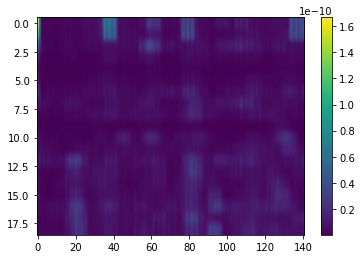

In [ ]:
plt.imshow(Data_pow[1,0,:,0,:],aspect='auto')
plt.colorbar()
plt.show()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


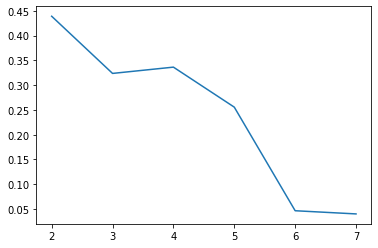

In [17]:
scaler = MinMaxScaler()

data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
data_  = scaler.fit_transform(data_.T).T
kmeans_init = list()
kmeans_label= list()
dat_tsne = TSNE(n_components=2,perplexity=10,random_state=0,init='pca').fit_transform(np.squeeze(data_))

for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(data_,kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()

# data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
matrix_sim = list()
sc_label   = list()
kmeans_inertia = list()
N_closters = 4
# for t in range(Data_pow.shape[4]):
# datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
# datos = np.squeeze(data_[:,:,t])
# matrix_sim.append(cosine_similarity(datos))
if t == 0:
  kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(dat_tsne)
# spect_cl = SpectralClustering(n_clusters=N_closters, 
#                               assign_labels='discretize',
#                               random_state=0,n_jobs=-1).fit(datos)

  old = kmeans.cluster_centers_
# old2= spect_cl.cluster_centers_
# else:
# spect_cl = SpectralClustering(n_clusters=N_closters, 
#                               assign_labels='discretize', 
#                               random_state=0,n_jobs=-1,n_init=datos).fit(datos)
if t == 2:
  kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

if t == 3:
  kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

if t == 4:
  kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

kmeans_label.append(kmeans.labels_)
kmeans_init.append(kmeans.n_init)
# sc_label.append(spect_cl.labels_)
# kmeans_inertia.append(kmeans.inertia_)

In [ ]:
old.shape

(7, 174)

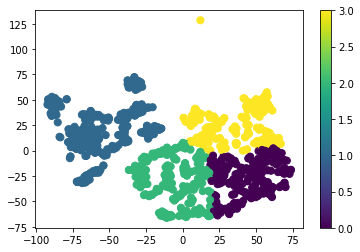

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

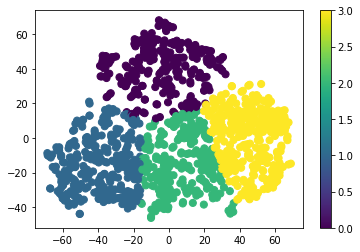

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

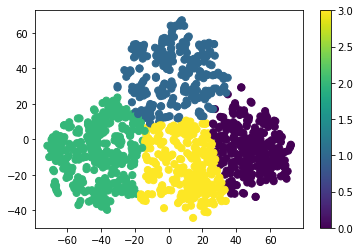

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

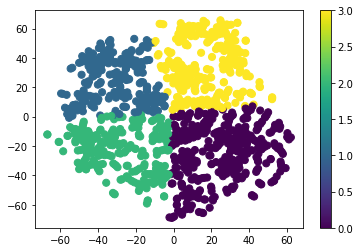

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

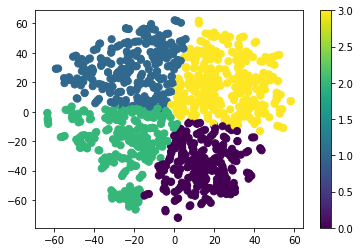

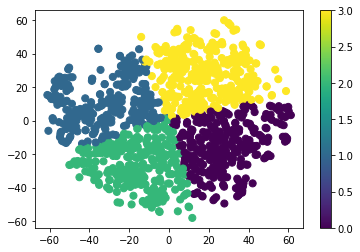

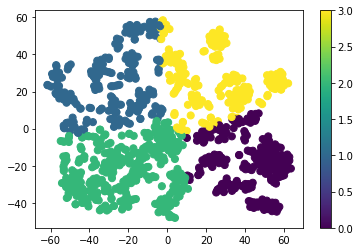

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

In [ ]:
savemat()

In [24]:
from scipy.stats import wilcoxon
from scipy import stats
data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2],Data_pow.shape[3],Data_pow.shape[4]))
# data.shape
gr = 2
PSD_gr=data[kmeans_label[0]==gr,:,:,:]
PSD_gr.shape
p_val = np.zeros((PSD_gr.shape[1],PSD_gr.shape[2],PSD_gr.shape[3]))
for ch in range(PSD_gr.shape[1]):
  for frq in range(PSD_gr.shape[2]):
    for t in range(PSD_gr.shape[3]):
      p_val[ch,frq,t] = stats.normaltest(np.squeeze(PSD_gr[:,ch,frq,t])).pvalue
# p_val -= p_val.min()
# p_val /= p_val.max()

In [ ]:
p_val

In [ ]:
Subjects = list(np.arange(1,32))
# canales de la base de datos
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# Frecuencia de muestreo de la base de datos.
sampling_freq  = 1000        
# ubicación de la base de datos.
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# Método utilizado para la función de ICA de MNE.
# method = 'fastica'
# Número de núcleos para ell multiproceso
# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# # ciclo de los sujetos.
# y = list()
# data_ref_ica = list()
# data_ref = list()

# for s in Subjects:
  # # carga de la información del sujetos.
  # S_ERP = loadmat(load_path + f"Sujeto_"+str(s)+".mat")
  # print('sujeto: ', s)
  # data = S_ERP['music']
  # # data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
  # data_target = data

  # # structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1005')
  # raw = mne.EpochsArray(data_target, info)


(1, 19, 31, 29)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 1000.0 Hz
>

In [ ]:
print(p_val.shape)

(19, 31, 29)


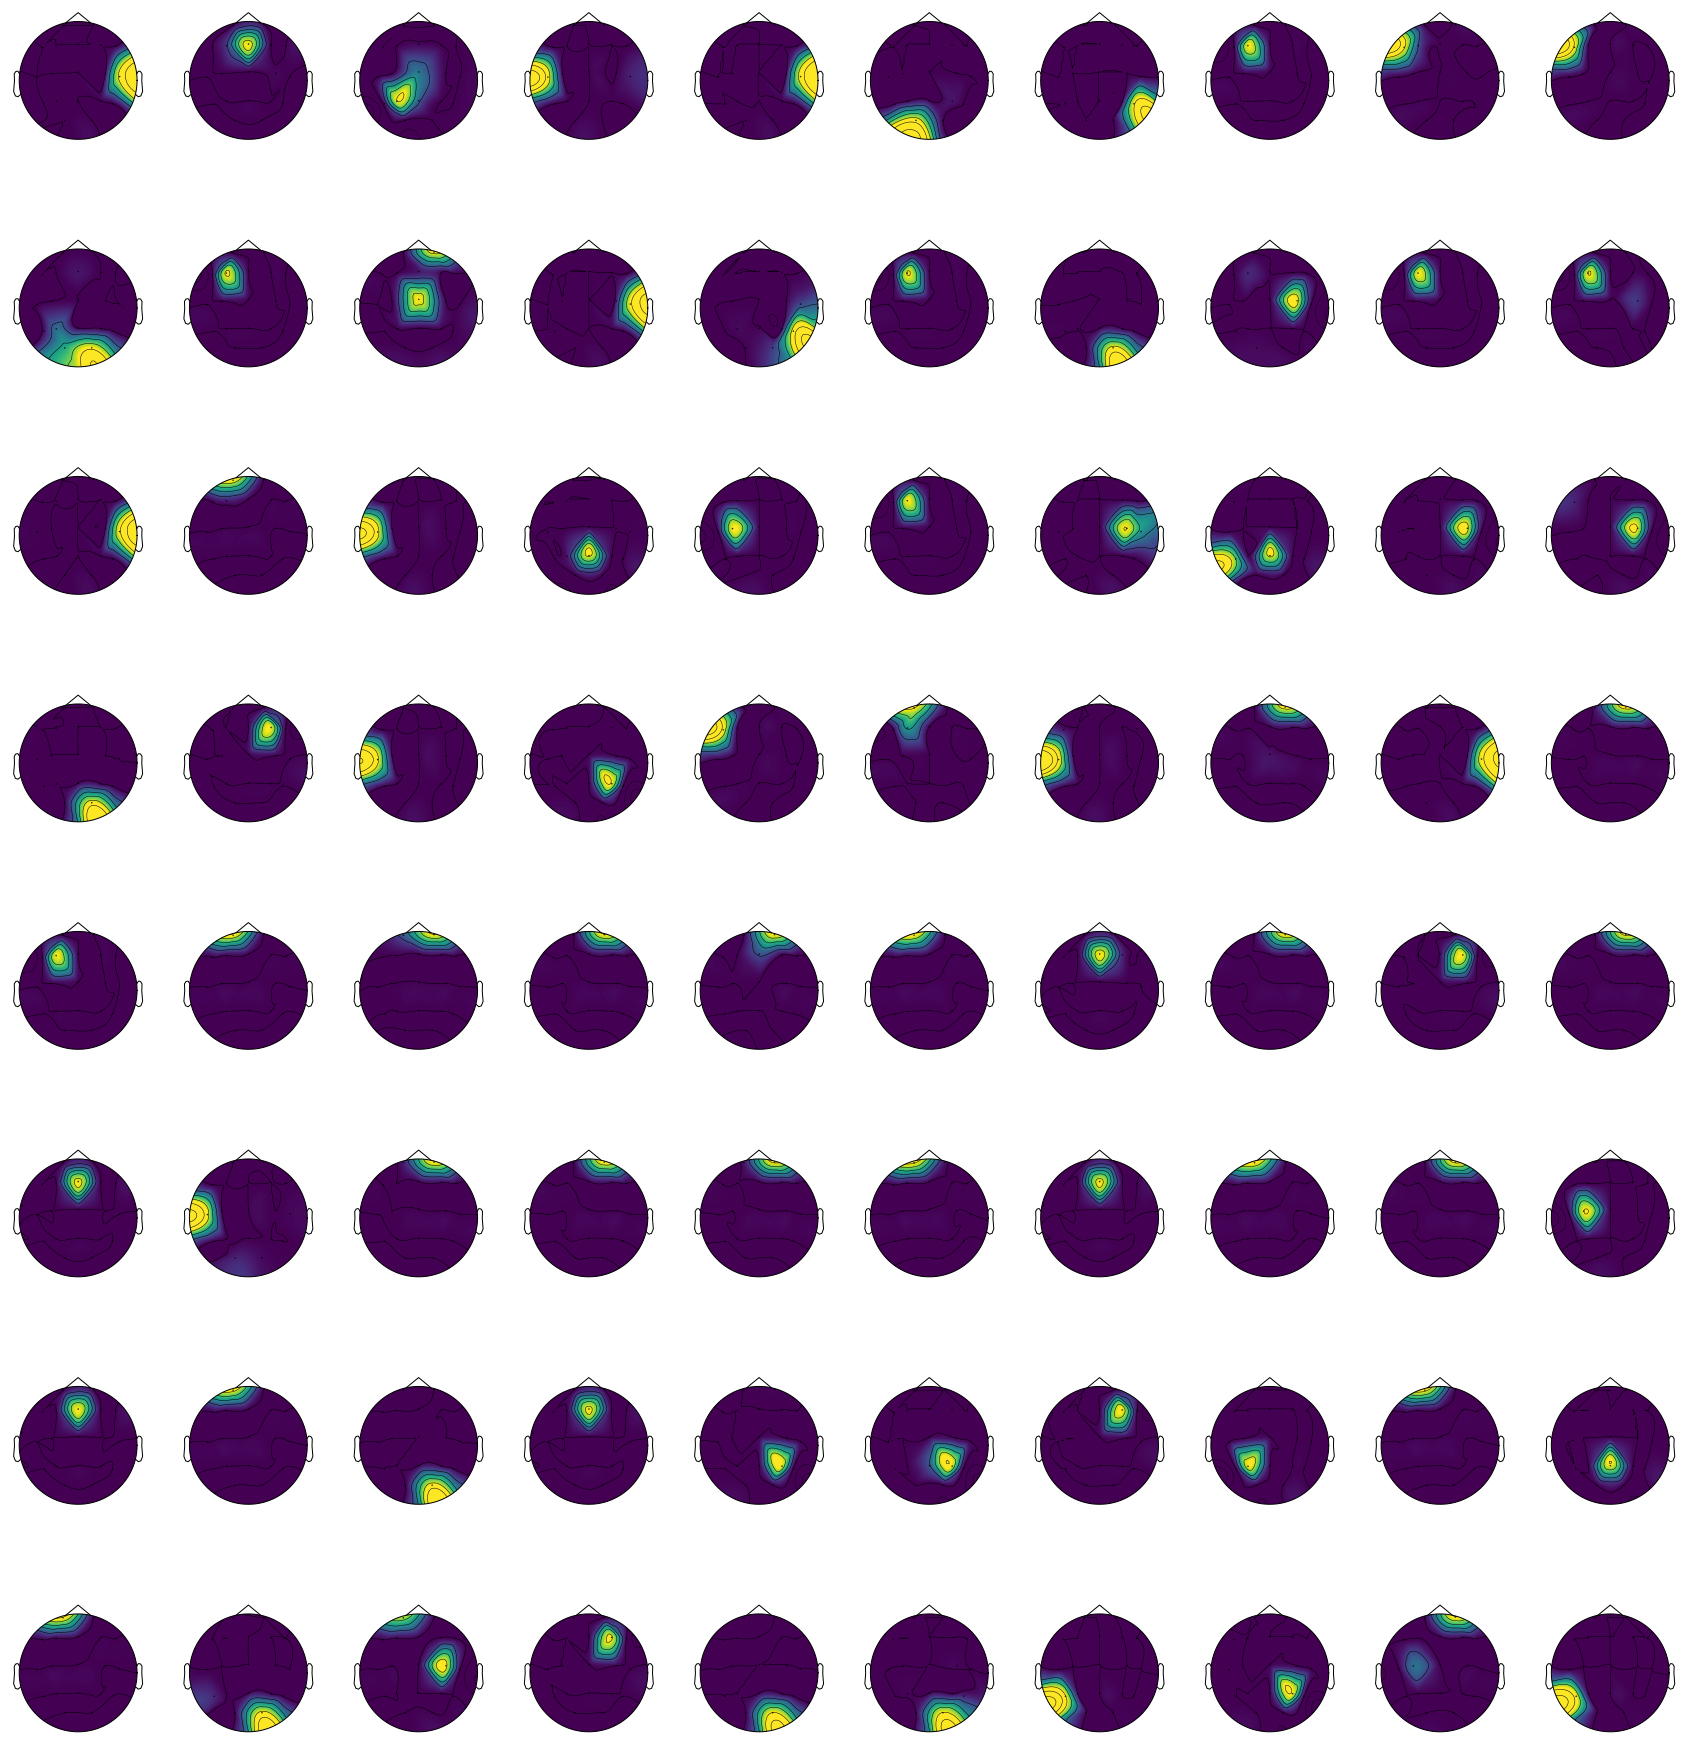

In [21]:
fig=plt.figure(figsize=(30,30))
itr = 1
windows = list(np.arange(0,29,3))
freqs = list(np.arange(0,31,4))
for freq in range(len(freqs)):
  for win in range(len(windows)):
    Data = p_val[:,freq,windows[win]]
    ax = fig.add_subplot(len(freqs),len(windows),itr)
    itr +=1
    mne.viz.plot_topomap(Data,
                          info, axes=ax, cmap='viridis', show=False, #sensors=True,
                          extrapolate='head', ch_type='eeg')



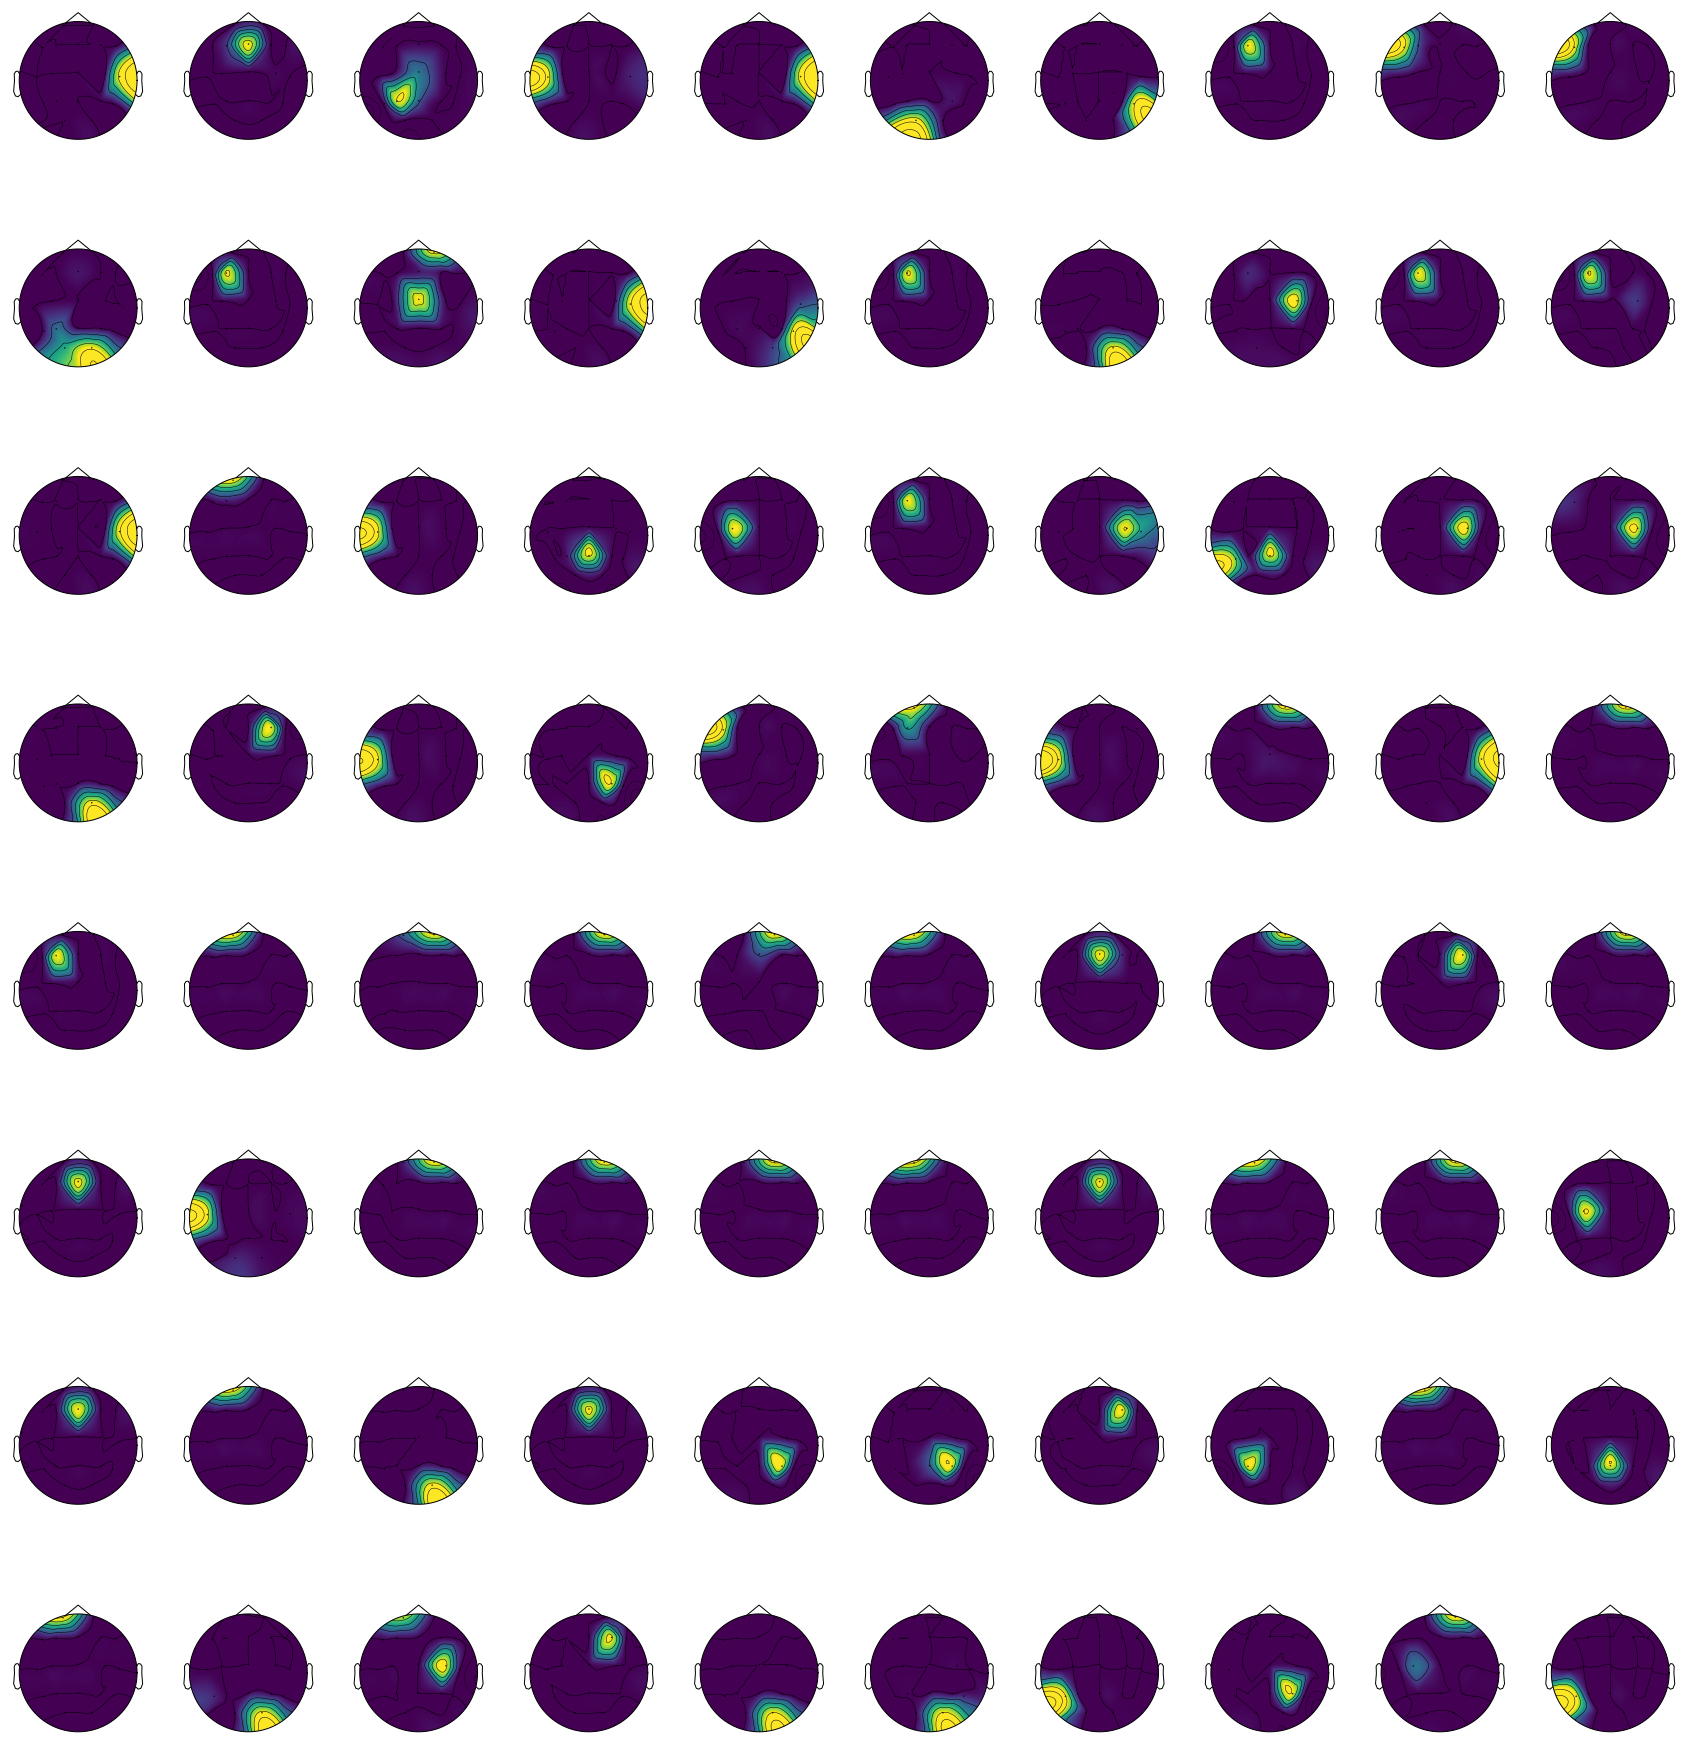

In [23]:
fig=plt.figure(figsize=(30,30))
itr = 1
windows = list(np.arange(0,29,3))
freqs = list(np.arange(0,31,4))
for freq in range(len(freqs)):
  for win in range(len(windows)):
    Data = p_val[:,freq,windows[win]]
    ax = fig.add_subplot(len(freqs),len(windows),itr)
    itr +=1
    mne.viz.plot_topomap(Data,
                          info, axes=ax, cmap='viridis', show=False, #sensors=True,
                          extrapolate='head', ch_type='eeg')



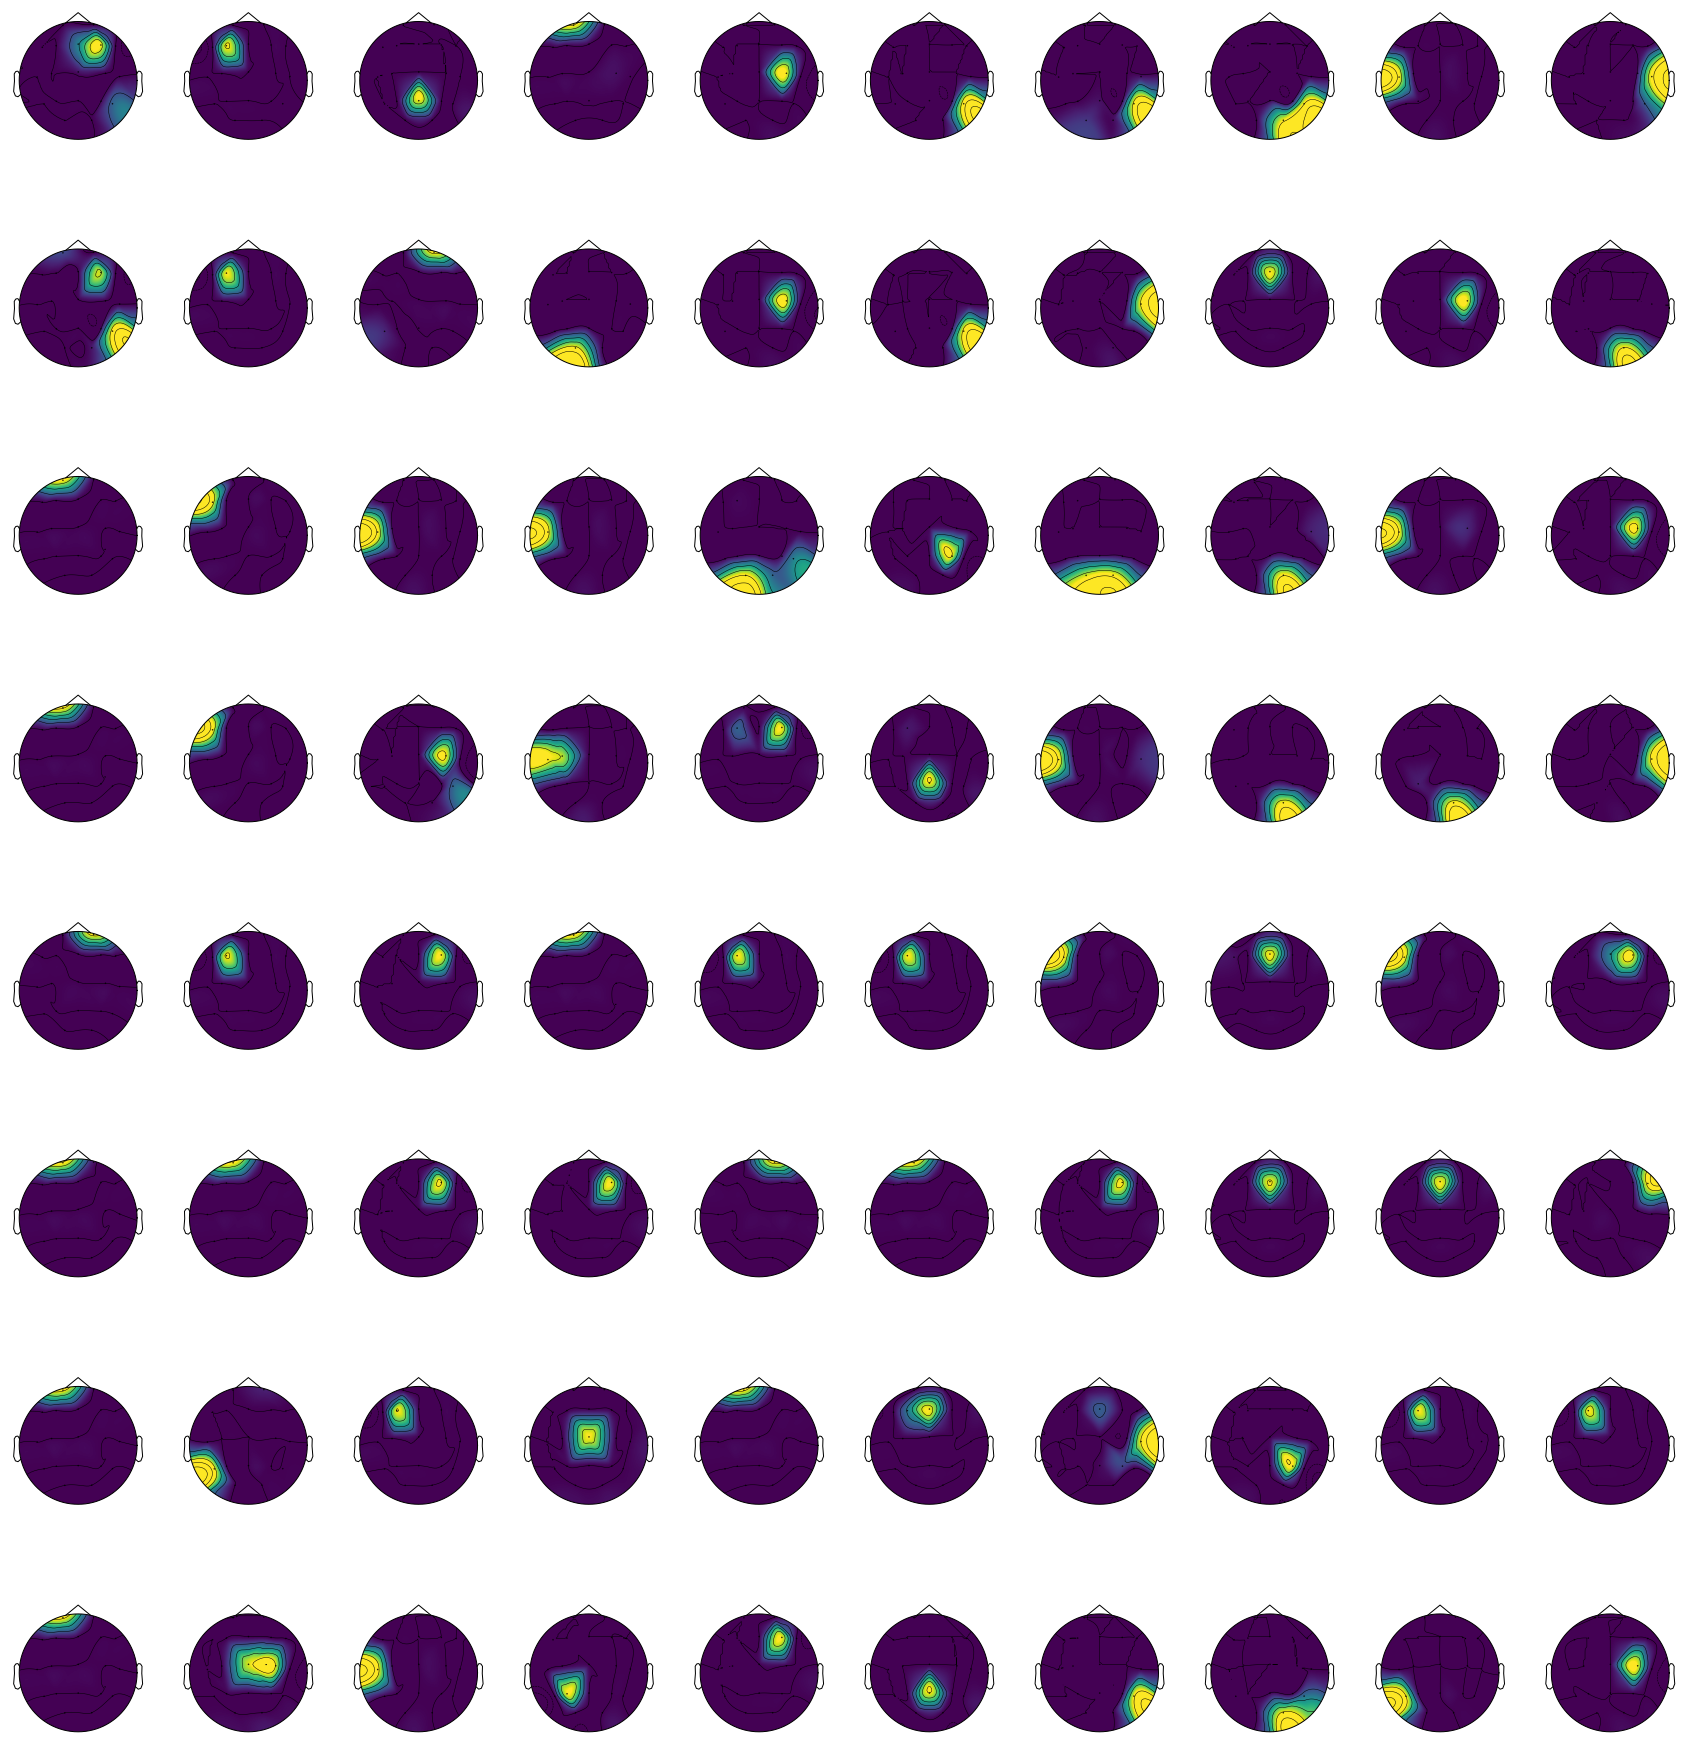

In [25]:
fig=plt.figure(figsize=(30,30))
itr = 1
windows = list(np.arange(0,29,3))
freqs = list(np.arange(0,31,4))
for freq in range(len(freqs)):
  for win in range(len(windows)):
    Data = p_val[:,freq,windows[win]]
    ax = fig.add_subplot(len(freqs),len(windows),itr)
    itr +=1
    mne.viz.plot_topomap(Data,
                          info, axes=ax, cmap='viridis', show=False, #sensors=True,
                          extrapolate='head', ch_type='eeg')



# agrupación con conectividad

In [ ]:
for gr in range(1):
  plv = plv_gr[gr]
  plv_m = np.zeros((plv.shape[0],plv.shape[1],plv.shape[2],plv.shape[3]))
  for fre in range(plv.shape[2]):#Subjects:
    for t in range(len(windows)):
      for cx in range(plv.shape[1]):
        if sum(plv[:,cx,fre,t]>0) == len(Subjects):
          plv_m[:,cx,fre,t] = plv[:,cx,fre,t].dot(1)
        else:
          plv_m[:,cx,fre,t] = plv[:,cx,fre,t].dot(0)

  plv_ = np.squeeze(np.mean(plv_m,axis=0)) # plv es de sujetos,conexiones,frecuencias y tiempos.

  itr = 1
  fig=plt.figure(figsize=(30,30))
  for fre in range(len(bands)-1):#Subjects:
    for t in range(plv_.shape[2]):
      ax = fig.add_subplot(len(bands)-1,plv_.shape[2],itr)
      itr +=1
      mne.viz.plot_topomap(bct.strengths_und(squareform(plv_[:,fre,t])),
                          info, axes=ax, cmap='viridis', show=False, #sensors=True,
                          extrapolate='head', ch_type='eeg')
      

In [ ]:
scaler = MinMaxScaler()

data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
data_  = scaler.fit_transform(data_.T).T
kmeans_init = list()
kmeans_label= list()
dat_tsne = TSNE(n_components=2,perplexity=10,random_state=0,init='pca').fit_transform(np.squeeze(data_))

for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(data_,kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()

# data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
matrix_sim = list()
sc_label   = list()
kmeans_inertia = list()
N_closters = 4
for tt in range(Data_pow.shape[4]):
# datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
# datos = np.squeeze(data_[:,:,t])
# matrix_sim.append(cosine_similarity(datos))
  if t == 0:
    kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(dat_tsne)
  # spect_cl = SpectralClustering(n_clusters=N_closters, 
  #                               assign_labels='discretize',
  #                               random_state=0,n_jobs=-1).fit(datos)

    old = kmeans.cluster_centers_
  # old2= spect_cl.cluster_centers_
  # else:
  # spect_cl = SpectralClustering(n_clusters=N_closters, 
  #                               assign_labels='discretize', 
  #                               random_state=0,n_jobs=-1,n_init=datos).fit(datos)
  if t == 2:
    kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

  if t == 3:
    kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

  if t == 4:
    kmeans = KMeans(n_clusters=4, random_state=0,init=old).fit(dat_tsne) # , init=old

  kmeans_label.append(kmeans.labels_)
  kmeans_init.append(kmeans.n_init)
  # sc_label.append(spect_cl.labels_)
  # kmeans_inertia.append(kmeans.inertia_)

In [ ]:
scaler = StandardScaler()

data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(np.squeeze(data_),kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()
data_  = scaler.fit_transform(data_.T).T
kmeans_init = list()
kmeans_label= list()
dat_tsne = TSNE(n_components=2,perplexity=10,random_state=0,init='pca').fit_transform(np.squeeze(data_))
data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
matrix_sim = list()
sc_label   = list()
kmeans_inertia = list()
N_closters = 4 # np.array(sil).argmin()+1
for t in range(Data_pow.shape[4]):
  # datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
  datos = np.squeeze(data_[:,:,t])
  matrix_sim.append(cosine_similarity(datos))
  if t == 0:
    kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(datos)
    # spect_cl = SpectralClustering(n_clusters=N_closters, 
    #                               assign_labels='discretize',
    #                               random_state=0,n_jobs=-1).fit(datos)

    old = kmeans.cluster_centers_
    # old2= spect_cl.cluster_centers_
  else:
    # spect_cl = SpectralClustering(n_clusters=N_closters, 
    #                               assign_labels='discretize', 
    #                               random_state=0,n_jobs=-1,n_init=datos).fit(datos)
    kmeans = KMeans(n_clusters=4, random_state=0, init=old).fit(datos) # , init=old
    old = kmeans.cluster_centers_
  
  kmeans_label.append(kmeans.labels_)
  kmeans_init.append(kmeans.n_init)
  # sc_label.append(spect_cl.labels_)
  kmeans_inertia.append(kmeans.inertia_)

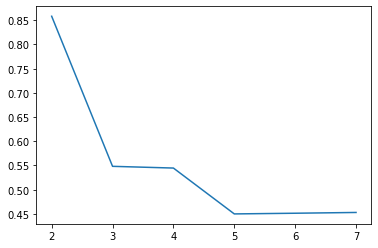

In [ ]:
scaler = StandardScaler() # MinMaxScaler()

data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(np.squeeze(data_),kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()
# data_  = scaler.fit_transform(data_)
kmeans_init = list()
kmeans_label= list()
dat_tsne = TSNE(n_components=2,perplexity=15,random_state=0,init='pca').fit_transform(np.squeeze(data_))
data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
matrix_sim = list()
sc_label   = list()
kmeans_inertia = list()
N_closters = 4 # np.array(sil).argmin()+1
for t in range(Data_pow.shape[4]):
  # datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
  datos = np.squeeze(data[:,:,t])
  matrix_sim.append(cosine_similarity(datos))
  if t == 0:
  kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(datos)
  spect_cl = SpectralClustering(n_clusters=N_closters, 
                                assign_labels='discretize', 

                                random_state=0,n_jobs=-1).fit(datos)
  old = kmeans.cluster_centers_
  # else:
  #   kmeans = KMeans(n_clusters=4, random_state=0).fit(datos) # , init=old
  #   old = kmeans.cluster_centers_
  
  kmeans_label.append(kmeans.labels_)
  kmeans_init.append(kmeans.n_init)
  sc_label.append(spect_cl.labels_)
  kmeans_inertia.append(kmeans.inertia_)

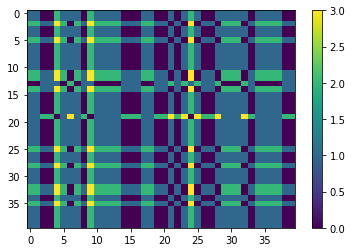

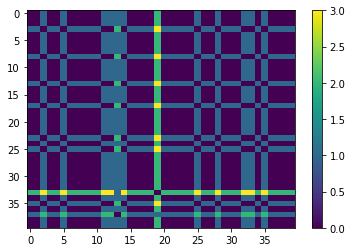

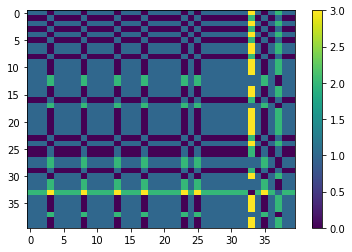

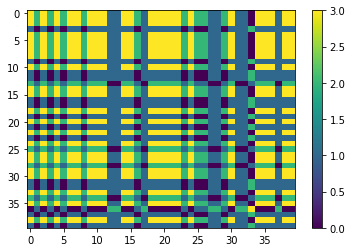

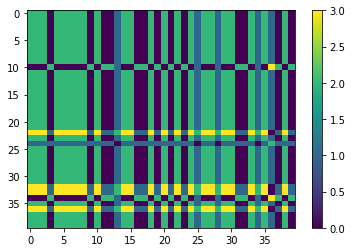

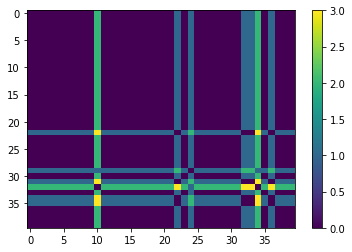

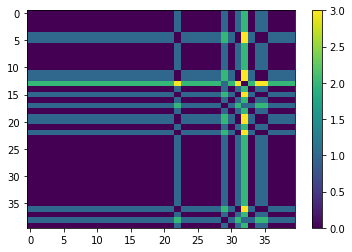

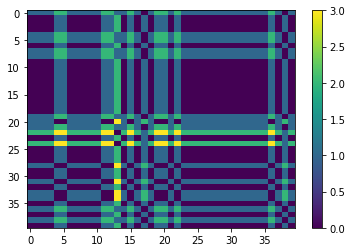

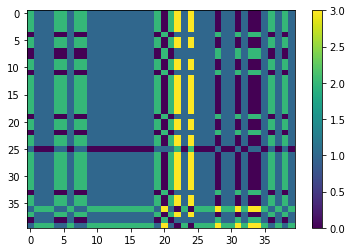

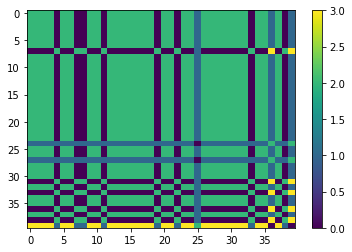

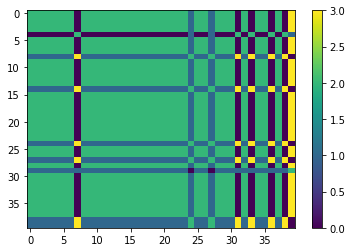

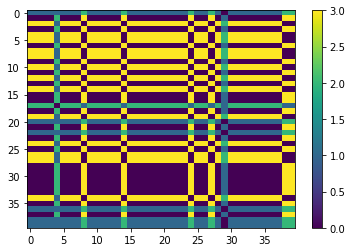

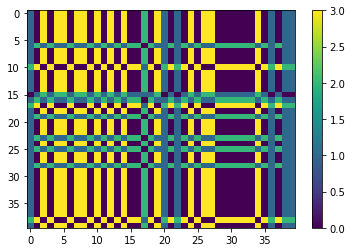

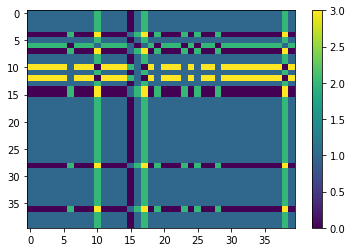

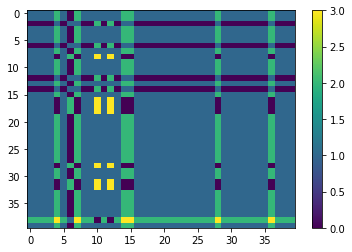

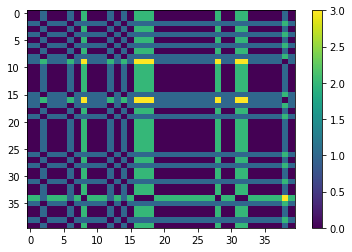

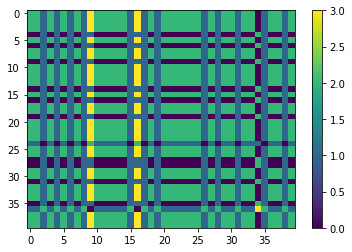

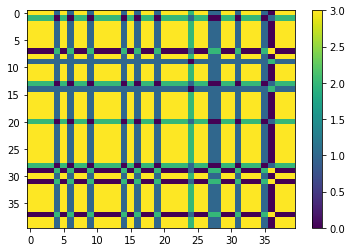

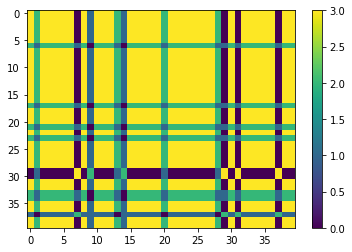

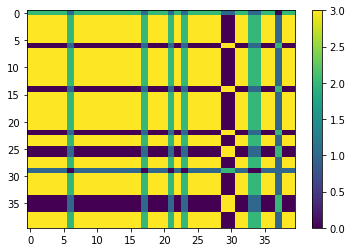

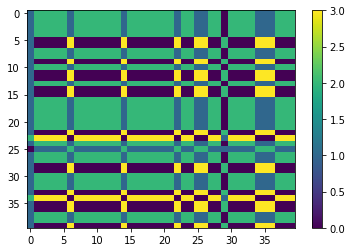

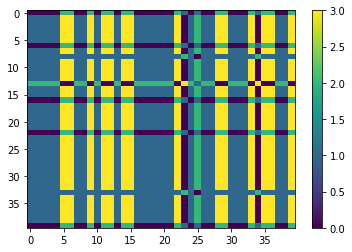

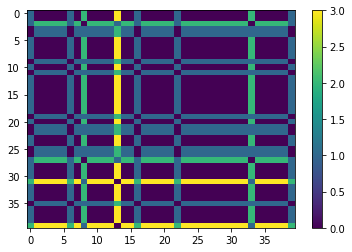

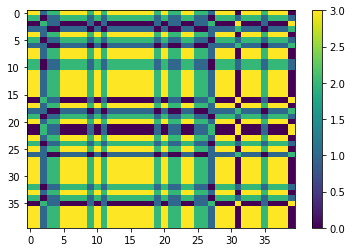

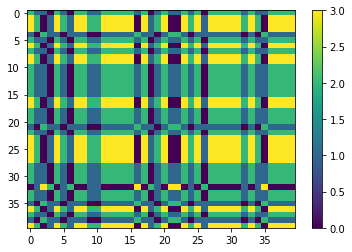

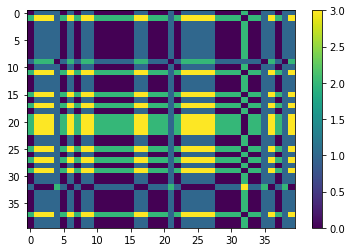

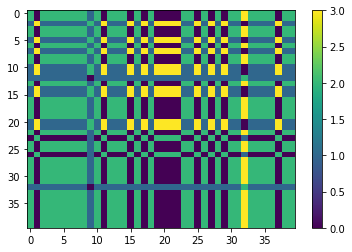

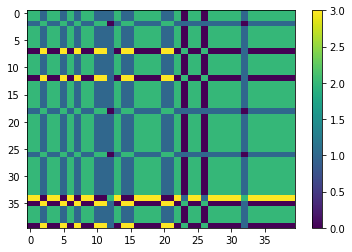

In [ ]:
from sklearn.metrics import pairwise_distances

for t in range(1,Data_pow.shape[4]):
  X = kmeans_label[t] 
  Y = kmeans_label[t-1] 
  pdist = pairwise_distances(X.reshape(-1,1),Y.reshape(-1,1),'euclidean')
  plt.figure()
  plt.imshow(pdist,aspect='auto')
  plt.colorbar()
  plt.show()

In [ ]:
alpha = np.arange(0.1,1,0.1)
Ctotal_t_s = list()
for alp in range(len(alpha)):
  Ctotal_t = list()
  for t in range(1,Data_pow.shape[4]):
    Csnap = sc_label[t]
    # PCQ 
    Ctem_ = KMeans(n_clusters=N_closters, random_state=0).fit(matrix_sim[t-1])
    Ctem  = Ctem_.inertia_
    # PCM
    # Ctem  = kmeans_label[t]
    Ctotal_t.append(alpha[alp]*Ctem+(1-alpha[alp])*Csnap)
 Ctotal_t_a.append(Ctotal_t)  

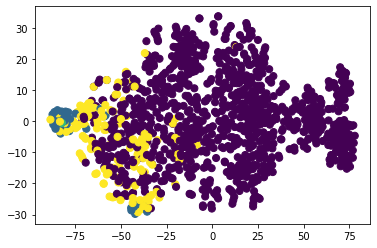

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for t in range(Data_pow.shape[4]):
  im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[t],
                   s=50, cmap='viridis')
  ims.append([im])
ani =  animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                 repeat_delay=1000)
ani.save('dynamic_images_alpha_beta.mp4')
plt.show()

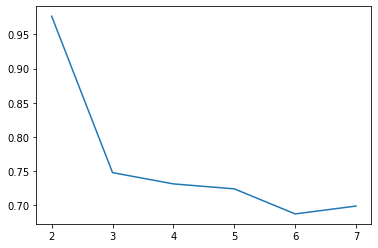

In [ ]:
scaler = StandardScaler()

data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(np.squeeze(data_),kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()
data_  = scaler.fit_transform(data_.T).T
kmeans_init = list()
kmeans_label= list()
dat_tsne = TSNE(n_components=2,perplexity=15,random_state=0,init='pca').fit_transform(np.squeeze(data_))
data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
matrix_sim = list()
sc_label   = list()
kmeans_inertia = list()
N_closters = 4 # np.array(sil).argmin()+1
for t in range(Data_pow.shape[4]):
  # datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
  datos = np.squeeze(data_[:,:,t])
  matrix_sim.append(cosine_similarity(datos))
  if t == 0:
    kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(datos)
    # spect_cl = SpectralClustering(n_clusters=N_closters, 
    #                               assign_labels='discretize',
    #                               random_state=0,n_jobs=-1).fit(datos)

    old = kmeans.cluster_centers_
    # old2= spect_cl.cluster_centers_
  else:
    # spect_cl = SpectralClustering(n_clusters=N_closters, 
    #                               assign_labels='discretize', 
    #                               random_state=0,n_jobs=-1,n_init=datos).fit(datos)
    kmeans = KMeans(n_clusters=4, random_state=0, init=old).fit(datos) # , init=old
    old = kmeans.cluster_centers_
  
  kmeans_label.append(kmeans.labels_)
  kmeans_init.append(kmeans.n_init)
  # sc_label.append(spect_cl.labels_)
  kmeans_inertia.append(kmeans.inertia_)

IndexError: ignored

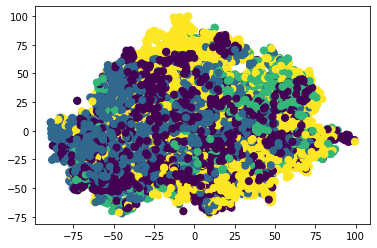

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for t in range(Data_pow.shape[4]):
  im = plt.scatter(dat_tsne_[t][:,0],dat_tsne_[t][:,1],c=kmeans_label[t],
                   s=50, cmap='viridis')
  ims.append([im])
ani =  animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                 repeat_delay=1000)
ani.save('dynamic_images_tsne_kmeans2.mp4')
plt.show()

In [ ]:
spect_cl = SpectralClustering(n_clusters=N_closters, 
                                  assign_labels='discretize',n_init=datos, 
                                  random_state=0,n_jobs=-1).fit(datos)

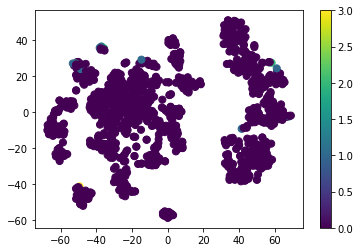

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=spect_cl.labels_,
                   s=50, cmap='viridis')
plt.colorbar()

In [ ]:
!pip install -U scikit-learn

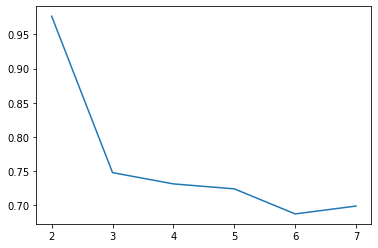

In [ ]:
scaler = StandardScaler()
data = Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))
data_= Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3]*Data_pow.shape[4]))
sil = list()
for gr in range(2,8):
    kmeans = KMeans(n_clusters=gr, random_state=0).fit(np.squeeze(data_))
    sil.append(silhouette_score(np.squeeze(data_),kmeans.labels_))
plt.plot(sil)
plt.xticks([0,1,2,3,4,5],[2,3,4,5,6,7])
plt.show()
data_  = scaler.fit_transform(data_)
kmeans_init = list()
kmeans_label= list()
matrix_sim = list()
sc_label   = list()
data_  = data_.reshape((data_.shape[0],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4])) 
N_closters = np.array(sil).argmin()
dat_tsne_  = list()
for t in range(Data_pow.shape[4]):
  # datos = scaler.fit_transform(np.squeeze(data[:,:,t]))
  datos = np.squeeze(data_[:,:,t])
  
  matrix_sim.append(cosine_similarity(datos))
  if t == 0:
    dat_tsne = TSNE(n_components=2,perplexity=10,random_state=0,init='pca').fit_transform(np.squeeze(datos))

    kmeans = KMeans(n_clusters=N_closters, random_state=0).fit(dat_tsne)

    # spect_cl = SpectralClsustering(n_clusters=N_closters, 
    #                               assign_labels='discretize', 
    #                               random_state=0,n_jobs=-1).fit(dat_tsne)
    old = kmeans.cluster_centers_
  else:
    dat_tsne = TSNE(n_components=2,perplexity=10,random_state=0,init=dat_tsne).fit_transform(np.squeeze(datos))
    kmeans = KMeans(n_clusters=4, random_state=0, init=old).fit(dat_tsne) # , init=old
    # spect_cl = SpectralClustering(n_clusters=N_closters,n_init= old,
    #                               assign_labels='discretize', 
    #                               random_state=0,n_jobs=-1).fit(dat_tsne)
    old = kmeans.cluster_centers_
  
  dat_tsne_.append(dat_tsne)
  kmeans_label.append(kmeans.labels_)
  kmeans_init.append(kmeans.n_init)
  # sc_label.append(spect_cl.labels_)

In [ ]:
np.array(sil)

array([0.97657726, 0.74761967, 0.73113835, 0.72387   , 0.68717651,
       0.69868267])

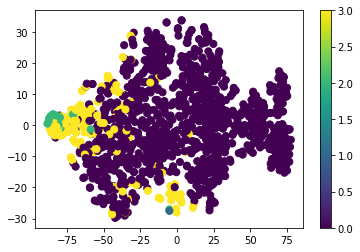

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

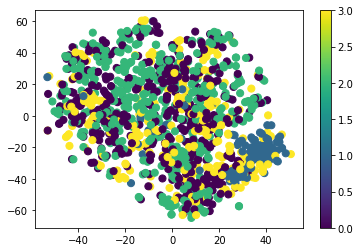

In [ ]:
im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[0],
                   s=50, cmap='viridis')
plt.colorbar()

([<matplotlib.axis.XTick at 0x7f98e1642790>,
 [Text(0, 0, 'alpha'), Text(0, 0, '$beta_{low}$')])

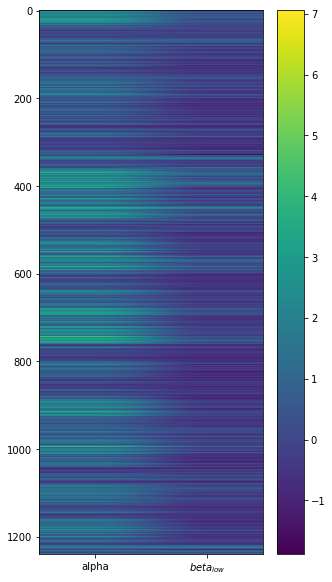

In [ ]:
plt.figure(figsize=(5,10))
plt.imshow(data_[:,:2,0],aspect='auto')
plt.colorbar()
plt.xticks([0,1],['alpha','$beta_{low}$'])

([<matplotlib.axis.XTick at 0x7f98decfc110>,
 [Text(0, 0, 'alpha')])

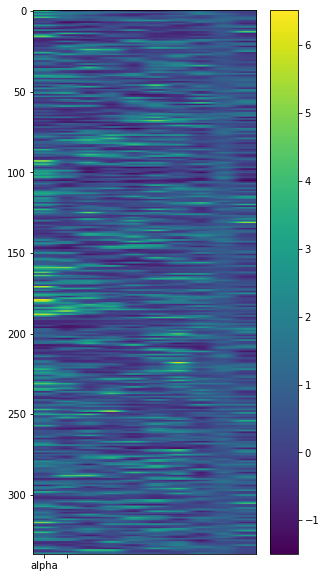

In [ ]:
plt.figure(figsize=(5,10))
plt.imshow(data_[kmeans_label[8]==0¿,0,:10],aspect='auto')
plt.colorbar()
plt.xticks([0,1],['alpha'])

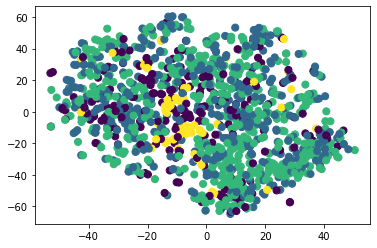

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for t in range(Data_pow.shape[4]):
  im = plt.scatter(dat_tsne[:,0],dat_tsne[:,1],c=kmeans_label[t],
                   s=50, cmap='viridis')
  ims.append([im])
ani =  animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                 repeat_delay=1000)
ani.save('dynamic_images_alpha_beta2.mp4')
plt.show()

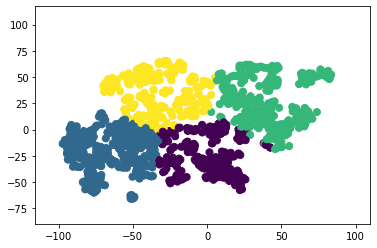

In [ ]:
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for t in range(Data_pow.shape[4]):
  im = plt.scatter(dat_tsne_[t][:,0],dat_tsne_[t][:,1],c=kmeans_label[t],
                   s=50, cmap='viridis')
  
  ims.append([im])
ani =  animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                 repeat_delay=1000)
ani.save('dynamic_images_tsne_kmeans2.mp4')
plt.show()

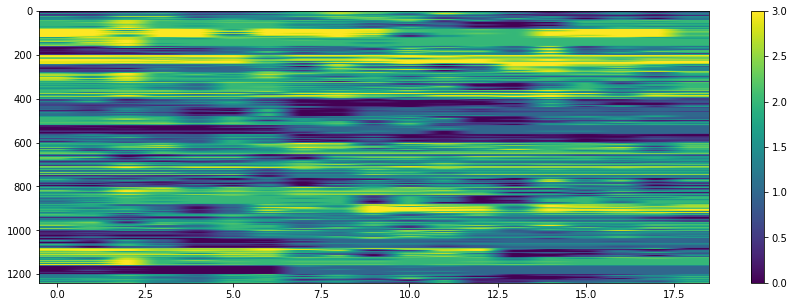

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(np.asarray(kmeans_label).T,aspect='auto',)
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.asarray(kmeans_label).T)
plt.colorbar()
plt.show()

In [ ]:
np.asarray(kmeans_label).shape

(1, 1240)

In [ ]:
plt.imshow(np.asarray(kmeans_label),aspect='auto',cmap='jet')
plt.colorbar()

In [ ]:
# kmeans_label
kmeans.cluster_centers_.shape 

(3, 551)

In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.0 MB/s 


In [ ]:
# Cluster
from tslearn.clustering import KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [ ]:
plt.imshow(y_pred.reshape(-1,1),aspect='auto')

In [ ]:
# seed = 0
# np.random.seed(seed)
# X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes
# X_train = X_train[y_train < 4]
# np.random.shuffle(X_train)
# Keep only 50 time series
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# sz = X_train.shape[1]
X_train =  Data_pow.reshape((Data_pow.shape[0]*Data_pow.shape[1],Data_pow.shape[2]*Data_pow.shape[3],Data_pow.shape[4]))

gak_km = KernelKMeans(n_clusters=3,
                      kernel="rbf",
                      # kernel_params={"sigma": "auto"},
                      n_init=20,
                      verbose=True,
                      random_state=seed)
y_pred = gak_km.fit_predict(X_train[:,:,:1])

# plt.figure()
# for yi in range(3):
#     plt.subplot(3, 1, 1 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.title("Cluster %d" % (yi + 1))

# plt.tight_layout()
# plt.show()



In [ ]:
from tslearn.generators import random_walks

X = random_walks(n_ts=50, sz=32, d=1)
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5,
                      random_state=0).fit(X)
# km.cluster_centers_.shape

km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                           max_iter_barycenter=5,
                           random_state=0).fit(X)
# km_dba.cluster_centers_.shape

km_sdtw = TimeSeriesKMeans(n_clusters=3, metric="softdtw", max_iter=5,
                           max_iter_barycenter=5,
                           metric_params={"gamma": .5},
                           random_state=0).fit(X)
# km_sdtw.cluster_centers_.shape

X_bis = to_time_series_dataset([[1, 2, 3, 4],
                                 [1, 2, 3],
                                 [2, 5, 6, 7, 8, 9]])
km = TimeSeriesKMeans(n_clusters=2, max_iter=5,
                       metric="dtw", random_state=0).fit(X_bis)
# km.cluster_centers_.shape


ModuleNotFoundError: ignored

In [ ]:
esti     = loadmat('/content/esti.mat')['esti']
y_km_t_3 = loadmat('/content/y_km.mat')['y_km_t_3']
y_km_t_2 = loadmat('/content/y_km.mat')['y_km_t_2']
y_km_f_3 = loadmat('/content/y_km.mat')['y_km_f_3']
y_km_f_2 = loadmat('/content/y_km.mat')['y_km_f_2']
y_km_e_3 = loadmat('/content/y_km.mat')['y_km_e_3']
y_km_e_2 = loadmat('/content/y_km.mat')['y_km_e_2']

In [ ]:
# organizar datos según clases seleccionadas
data_org_gr = list()
pos_t2 = np.concatenate(np.asarray(list(y_km_t_3)).reshape(-1,1)[esti[0,:].astype(bool)])
for gr in range(1):
  data_org_ = list()
  for sub in Subjects:
    data_org_.append(data_ref[sub-1][pos_t2==gr,:,:])
  data_org_gr.append(data_org_)

In [ ]:
del raw,rereferenced_raw, ref_data

# conectividad agrupada por tempo

In [ ]:
from mne.connectivity import spectral_connectivity as connectivity
from scipy.spatial.distance import squareform
# Prueba de grupo
fmin = 1
fmax = 45
tmin = 0
tmax = 15001
conectividad_plv_gr = list()
cwt_n_cycles = 5,
for gr in range(1):
  conectividad_plv = list()
  for sub in Subjects:
    [con,freqs,times,n_epochs,n_tapers] = connectivity(data_org_gr[gr][sub-1],
                                                       method=['plv'], 
                                                       mode='cwt_morlet', 
                                                       cwt_freqs = np.arange(fmin,fmax),
                                                       cwt_n_cycles = cwt_n_cycles,
                                                       sfreq=sampling_freq, 
                                                       #  fmin=fmin, fmax=fmax,
                                                       tmin=tmin,tmax = tmax,
                                                       #  mt_bandwidth = 4,
                                                      #  faverage=True, 
                                                      #  mt_adaptive=True, 
                                                       verbose = 10)
    con_ = np.zeros((171,len(freqs),len(times)))
    for fr in range(len(freqs)):
      for t in range(len(times)):
        con_[:,fr,t] = squareform(np.squeeze(con[:,:,fr,t])+np.squeeze(con[:,:,fr,t]).T)
    # conectividad_plv.append(con_)
    del con
    savemat(load_path+f'Conectividad_plv_gr'+str(gr+1)+'_Sub'+str(sub)+'_t3.mat',
            {'con':con_,'freqs':freqs,'times':times,'n_epochs':n_epochs})
  # conectividad_plv_gr.append(conectividad_plv)

In [ ]:
freqs = loadmat(load_path+f'Conectividad_plv_gr'+str(1)+'_Sub'+str(1)+'_t3.mat')['freqs']
times = loadmat(load_path+f'Conectividad_plv_gr'+str(1)+'_Sub'+str(1)+'_t3.mat')['times']
con_ = loadmat(load_path+f'Conectividad_plv_gr'+str(1)+'_Sub'+str(1)+'_t3.mat')['con']
window = 1
step = window*sampling_freq
windows = np.arange(0,con_.shape[2]-window,step)

for gr in range(1):
  XT = np.zeros((len(Subjects),171*freqs.shape[1]*len(windows)))
  for sub in Subjects:
    con_ = loadmat(load_path+f'Conectividad_plv_gr'+str(gr+1)+'_Sub'+str(sub)+'_t3.mat')['con']
    temp = np.zeros((171,freqs.shape[1],len(windows)))
    for win in range(len(windows)):
      temp[:,:,win] = np.mean(con_[:,:,int(windows[win]):int(windows[win]+window)],axis=2)
    XT[sub-1,:]=temp.reshape((temp.shape[0]*temp.shape[1]*temp.shape[2]))
  

In [ ]:
XT.shape

(31, 26676)

In [ ]:
del temp

In [ ]:
del con_

In [ ]:
acc = np.array([94.58,67.90,86.20,90.05,95.70,93.64,94.16,86.95,91.70,97.52,
                88.35,91.15,85.02,94.66,93.21,96.86,97.62,79.04,97.91,97.64,
                90.61,92.78,95.14,91.18,81.36,77.08,94.13,91.98,92.93,96.67,
                89.62])
YT = acc[:].reshape(-1,1)

In [ ]:
#----------------------------------------------------------------------------------------------------------------
ind_YT = (np.argsort(acc).reshape(-1))
# acc = acc[ind_YT]
# acc_ = acc_[ind_YT]
# for each sample (row) we apply min-max transformation
XT_norm_ = np.zeros((XT.shape))
for k in range(XT.shape[0]):
  XT_norm_[k,:] = (XT[k,:]-XT[k,:].min())/(XT[k,:].max()-XT[k,:].min())
XT_norm = XT_norm_[ind_YT,:]
#----------------------------------------------------------------------------------------------------------------
# for each sample (row) we apply min-max transformation
# YTa = np.zeros((YT_.shape))
# for k in range(YT_.shape[0]):
#   YTa[k,:] = (YT_[k,:]-YT_[k,:].min())/(YT_[k,:].max()-YT_[k,:].min())
# YT = YTa[ind_YT,:]
YT = YT[ind_YT,:]

In [ ]:
#----------------------------------------------------------------------------------------------------------------
# estimating average gamma_y value using 10 subsets
skf     = KFold(n_splits=10, shuffle=True, random_state=123)
#----------------------------------------------------------------------------------------------------------------
gamma_y = []
for train_index, valid_index in skf.split(YT):
  dd = pairwise_distances(YT[valid_index],YT[valid_index])
  d  = 0.5*(dd+dd.T) 
  d  = d-np.diag(np.diag(d))
  gamma_y.append(np.median(squareform(d)))
gamma_y_YT = np.median(np.array(gamma_y))
print('Average gamma_y using probs:',gamma_y_YT)
#----------------------------------------------------------------------------------------------------------------
del dd,d
#----------------------------------------------------------------------------------------------------------------
# computing kernel target and show
gamma_y_YT = np.float32(gamma_y_YT)

Average gamma_y using probs: 6.2999999999999545


In [ ]:
# convert to tensor
ytf_YT = tf.convert_to_tensor(YT,dtype=tf.float32)
print('ytf_YT dimensions:',ytf_YT.shape)
#----------------------------------------------------------------------------------------------------------------
# define kernel
scalar_kernely_YT = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, 
                                                                length_scale=gamma_y_YT)
l_YT              = scalar_kernely_YT.matrix(ytf_YT, ytf_YT)
print('kernel dimensions YTQ:',l_YT.shape)
#----------------------------------------------------------------------------------------------------------------
# ordering data
# ind_YT = np.argsort(acc).reshape(-1)
# l_YT   = l_YT.numpy()[ind_YT]
# l_YT   = l_YT[:,ind_YT]


ytf_YT dimensions: (31, 1)
kernel dimensions YTQ: (31, 31)


# Esquema de analisis por validacion cruzada de grupos en musica

1. Calcular rotacion lineal con cka sobre espacio de conectividades concatenadas por bandas a lo largo de sujetos

$\mathbf{X} \in \mathbb{R}^{N_s \times P}$

$N=31$ $\# $sujetos; $P = |\Delta_f| \times C(C-1)/2 =2 \times (19(18)/2) = 171$

1. Normalizar X por filas de 0 a 1
2. Acc del acc entre music vs resting
3. rotacion con cka: por folds
  - definir num folds = 10 -> usar train_test_split(X, Y, test_size=0.1, random_state=0)
  - correr cka sobre el conjunto de train del paso anterior y guardar rho y normalizar
  rho   = abs(redcka.A_out['Proj/kernel:0']).sum(axis=1)
rho   -= min(rho)
rho   /=max(rho)

  - promediar rho a lo largo de los 10 folds, y pintar rho con sombras 
ver https://matplotlib.org/stable/gallery/recipes/fill_between_alpha.html
pintar media y sombras a 2 std\\

  $\tilde{\mathbf{\rho}}= \frac{1}{N}\sum^{\#folds}_{i=1} \mathbf{\rho}_i$ \\
    $\mathbf{\rho}_i\in[0,1]^P$
4. Ponderar matriz de entrada con vector rho promedio cka en 3

 $\hat{\mathbf{x}}_n = \mathbf{x}_n \circ \tilde{\mathbf{\rho}}$ \\

 $\mathbf{x}_n \in \mathbf{X};$  $\hat{\mathbf{x}}_n \in \hat{\mathbf{X}}$; $\hat{\mathbf{X}}\in\mathbb{R}^{N \times P}$

5. aplicar tsne sobre $\hat{\mathbf{X}}\in\mathbb{R}^{N \times P}$, para encontrar proyeccion $\mathbf{Z}= tsne(\mathbf{X})$; usar perplexity igual a lo usado en este cuaderno y num componentes en 2

6. correr silueta sobre Z para encontrar numero de grupos con kmeans

7. pintar conectividades por bandas y por grupos  promediando segun:


  $\mathbf{\rho}_c= \frac{1}{N_c}\sum_{\forall \hat{\mathbf{x}}_n| y_n=c } \hat{\mathbf{x}}_n$ \\

  $y_n\in\{1,2,\dots C\},$ C: numero grupos ideal segun silueta y y_n es la etiqueta del sujeto n segun kmeans fijando num de grupos en C.

segun las etiquetas estimadas en 6 (agregar acierto promedio por grupo segun kmeans)



In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# define cka parameters
epochs           = 200
batch_size       = 256
learning_rate    = 5e-4
l1               = 1e-3
l2               = l1
validation_split = 0
verbose          = 50
Q                = 0.9 # num of subjects to fix dimensions
#-----------------------------------------------------------------------------------------------------------------
# define cka
redcka           = Keras_CKA2(epochs=epochs,batch_size=batch_size,Q=Q,
                              learning_rate=learning_rate,
                              l1_param=l1,l2_param=l2,validation_split=validation_split,
                              verbose=0,gamma_y=gamma_y_YT)
#-----------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

loo  = LeaveOneOut()
loo.get_n_splits(YT)
rho_ = list()
matr = list() 
for train_index, test_index in loo.split(YT):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = XT_norm[train_index], XT_norm[test_index]
  y_train, y_test = YT[train_index], YT[test_index]
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

  #-----------------------------------------------------------------------------------------------------------------
  # apply cka to data
  redcka.fit_transform(X_train,y_train.astype('float64'))
  # computing rho (relevance feature vector)
  rho   = abs(redcka.A_out['Proj/kernel:0']).sum(axis=1)
  rho   -= min(rho)
  rho   /= max(rho)
  rho_.append(rho)
  matr.append(redcka.A_out['Proj/kernel:0'])
  #-----------------------------------------------------------------------------------------------------------------
# Promedio del rho en los folds
rho_m = np.mean(rho_,axis=0)
rho_s = np.std(rho_,axis=0)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [0]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [1]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [2]
(30, 26676) (1, 26676) (30, 1) (1, 1)


TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [3]
(30, 26676) (1, 26676) (30, 1) (1, 1)


TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [4]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [5]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [6]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [7]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [8]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [9]
(30, 26676) (1, 26676) (30, 1) (1, 1)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] TEST: [10]
(

In [ ]:
######################################################
MATr = np.mean(np.asarray(matr),axis=0)
#-----------------------------------------------------------------------------------------------------------------
Matr_pro = np.matmul(XT_norm,MATr)
# Matr_pro = XT_norm

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import normalized_mutual_info_score,silhouette_score,normalized_mutual_info_score,adjusted_rand_score,fowlkes_mallows_score

sil_acc = list()
sil_ = list()
# X_cka_mi = np.concatenate([YT],axis=1)
X_cka_rs = np.concatenate([XT_norm*rho_m],axis=1)
grupos = [2,3,4,5]
for num_clusters_ in range(len(grupos)):
  num_clusters = grupos[num_clusters_]
  # resting-state
  kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_cka_rs)
  km_cka_rs_ = kmeans.labels_
  sil_a = silhouette_score(X_cka_rs, km_cka_rs_)
  sil_.append(sil_a)

#   # MI
#   kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_cka_mi)
#   km_cka_mi_acc = kmeans.labels_
#   sil_a = silhouette_score(X_cka_mi, km_cka_mi_acc)
#   sil_acc.append(sil_a)

# # resting-state
# num_clusters = 3#grupos[np.argmax(sil_)]
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_cka_rs)
# km_cka_rs = kmeans.labels_
# sil = silhouette_score(X_cka_rs, km_cka_rs)
# print("silhouette rest "+str(sil))

# # MI
# num_clusters = 3#grupos[np.argmax(sil_acc)]
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_cka_mi)
# km_cka_mi_acc = kmeans.labels_
# sil = silhouette_score(X_cka_mi, km_cka_mi_acc)
# print("silhouette MI"+str(sil))

# # Metricas de grupos
# mutual_info = normalized_mutual_info_score(km_cka_rs,km_cka_mi_acc) #nformación mutua entre dos agrupaciones.
# print("mutual_info "+str(mutual_info))
# homogeneity = normalized_mutual_info_score(km_cka_rs,km_cka_mi_acc) # Información mutua normalizada entre dos agrupaciones.
# print("Homoge "+str(homogeneity))
# adjusted_ra = adjusted_rand_score(km_cka_rs,km_cka_mi_acc) # Índice de rand ajustado al azar.
# print("Adjust "+str(adjusted_ra))
# similitud   = fowlkes_mallows_score(km_cka_rs,km_cka_mi_acc) # Mide la similitud de dos agrupaciones de un conjunto de puntos
# print("Simili "+str(similitud))


In [ ]:
X_cka_g = XT_norm*rho_m
X_cka_g_= np.squeeze(np.mean(X_cka_g,axis=0).reshape((1,171,freqs.shape[1],len(windows))).shape)

In [ ]:
fig=plt.figure(figsize=(30,30))
itr = 1
for freq in range(N_freq):
  for win in range(len(windows)):
    Data = squareform()
    ax = fig.add_subplot(N_freq,len(windows),itr)
    itr +=1
    mne.viz.plot_topomap(Data,
                          info, axes=ax, cmap='viridis', show=False, #sensors=True,
                          extrapolate='head', ch_type='eeg')
    

In [ ]:
np.